# Importing Libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# 6.1

In [ ]:
# 6.1 Implement OR and AND gates using perceptron learning scheme
class Perceptron:
    def __init__(self, input_size, lr=1, epochs=100):
        self.W = np.zeros(input_size + 1)
        self.lr = lr
        self.epochs = epochs

    def activation(self, x):
        return 1 if x >= 0 else 0

    def predict(self, x):
        x = np.insert(x, 0, 1)
        z = self.W.T.dot(x)
        a = self.activation(z)
        return a

    def train(self, X, d):
        for _ in range(self.epochs):
            for i in range(d.shape[0]):
                y = self.predict(X[i])
                e = d[i] - y
                self.W = self.W + self.lr * e * np.insert(X[i], 0, 1)

In [ ]:
# OR
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
d_or = np.array([0, 1, 1, 1])

perceptron_or = Perceptron(input_size=2)
perceptron_or.train(X_or, d_or)

print("OR Gate:")
for i in range(X_or.shape[0]):
    print(f"Input: {X_or[i]}, Output: {perceptron_or.predict(X_or[i])}")

OR Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 1
Input: [1 0], Output: 1
Input: [1 1], Output: 1


In [ ]:
# AND
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
d_and = np.array([0, 0, 0, 1])

perceptron_and = Perceptron(input_size=2)
perceptron_and.train(X_and, d_and)

print("AND Gate:")
for i in range(X_and.shape[0]):
    print(f"Input: {X_and[i]}, Output: {perceptron_and.predict(X_and[i])}")

AND Gate:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


# 6.2

In [1]:
df = pd.read_csv('horseRacing.csv')
df.head()

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
0,495886,565129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.71,...,-1.16,0.0,1.87,1.87,-2.07,-1.96,-1.95,-0.30,8.0,17.0
1,495886,607093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.05,...,0.77,0.0,0.00,0.00,0.00,0.00,0.00,0.07,5.0,26.0
2,495886,637337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.97,...,-1.16,0.0,0.00,0.00,0.48,0.44,0.39,-0.86,7.0,17.0
3,495886,659819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,0.77,0.0,0.00,0.00,0.32,1.09,0.78,-0.86,1.0,4.0
4,495886,661530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08,...,0.77,0.0,0.00,0.00,0.00,0.00,0.39,1.17,4.0,7.0


In [2]:
print(df.columns)

Index(['race_id', 'horse_id', '1-101', '1-102', '1-103', '1-104', '1-105',
       '1-106', '1-107', '1-108', '1-109', '1-110', '1-111', '1-112', '1-113',
       '1-114', '1-115', '1-116', '1-117', '1-118', '1-119', '1-120', '1-121',
       '1-122', '1-123', '1-124', '1-125', '1-126', '1-127', '1-128', '1-129',
       '3-101', '3-102', '3-103', '3-104', '3-105', '3-106', '3-107', '3-109',
       '3-110', '3-114', '3-115', '3-116', '3-117', '3-118', '3-119', '3-120',
       '3-121', '3-122', '3-123', '3-124', '3-125', '3-130', '3-131', '3-132',
       '4-105', '4-109', '4-110', '4-114', '4-115', '4-116', '4-117',
       'calc_position', 'price'],
      dtype='object')


In [3]:
df['calc_position'] = df['calc_position'].apply(lambda x: 1 if x == 'Win' else 0)
df.describe()

,race_id,horse_id,1-101,1-102,1-103,1-104,1-105,1-106,1-107,1-108,...,3-132,4-105,4-109,4-110,4-114,4-115,4-116,4-117,calc_position,price
count,98390.000000,9.839000e+04,33668.000000,33788.000000,33749.000000,28734.000000,28830.000000,28830.000000,28825.000000,76209.000000,...,87428.000000,73839.000000,88958.000000,88446.000000,88571.000000,88038.000000,86988.000000,88920.000000,98390.0,98390.000000
mean,593346.525999,8.219212e+05,-0.035803,-0.038562,-0.040769,-0.046150,-0.062234,-0.048450,-0.058985,-0.000095,...,-0.001547,-0.081940,-0.003415,-0.003084,0.047144,0.058346,0.100101,-0.008975,0.0,20.720690
std,55771.004433,1.529959e+05,0.731264,0.728135,0.728328,0.685621,0.683572,0.679605,0.682367,0.877625,...,0.914389,0.771886,0.897224,0.897800,0.902434,0.906370,0.916024,0.906862,0.0,30.391718
min,495886.000000,6.496000e+03,-2.880000,-2.370000,-2.700000,-2.560000,-2.160000,-2.500000,-2.290000,-3.390000,...,-2.400000,-2.140000,-3.880000,-3.180000,-3.370000,-3.340000,-2.970000,-2.400000,0.0,0.000000
25%,544068.000000,7.474402e+05,-0.470000,-0.480000,-0.490000,-0.470000,-0.485000,-0.460000,-0.480000,-0.570000,...,-0.650000,-0.540000,-0.620000,-0.610000,-0.570000,-0.570000,-0.540000,-0.640000,0.0,6.000000
50%,591423.000000,8.012120e+05,-0.120000,-0.060000,-0.030000,-0.010000,-0.110000,-0.020000,-0.110000,0.000000,...,-0.450000,-0.370000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.320000,0.0,12.000000
75%,641592.000000,8.578128e+05,0.040000,0.100000,0.140000,0.140000,0.010000,0.100000,0.010000,0.580000,...,0.610000,0.000000,0.590000,0.580000,0.660000,0.670000,0.700000,0.470000,0.0,24.000000
max,719014.000000,2.501738e+06,4.760000,4.660000,4.200000,4.380000,4.180000,4.570000,4.560000,3.230000,...,4.420000,4.830000,3.750000,3.910000,3.800000,4.040000,3.890000,4.260000,0.0,1001.000000


In [4]:
race_encoder = OneHotEncoder()
race_encoded = race_encoder.fit_transform(df[['race_id']])
race_encoded_df = pd.DataFrame(race_encoded.toarray(), columns=race_encoder.categories_[0])

In [5]:
horse_encoder = OneHotEncoder()
horse_encoded = horse_encoder.fit_transform(df[['horse_id']])
horse_encoded_df = pd.DataFrame(horse_encoded.toarray(), columns=horse_encoder.categories_[0])

In [8]:
batch_size = 10000
processed_batches = []

for start in range(0, len(df), batch_size):
    batch = df.iloc[start:start+batch_size]
    # Apply encoding logic for this batch
    batch['race_id_encoded'] = LabelEncoder().fit_transform(batch['race_id'])
    batch['horse_id_encoded'] = LabelEncoder().fit_transform(batch['horse_id'])
    processed_batches.append(batch)

data_encoded = pd.concat(processed_batches, axis=0)

<ipython-input-8-d21a6586e658>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['race_id_encoded'] = LabelEncoder().fit_transform(batch['race_id'])
<ipython-input-8-d21a6586e658>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batch['horse_id_encoded'] = LabelEncoder().fit_transform(batch['horse_id'])
<ipython-input-8-d21a6586e658>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

# 6.3


In [12]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)
        self.bias1 = np.zeros((1, self.hidden_size))
        self.bias2 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_layer_input = np.dot(X, self.weights1) + self.bias1
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights2) + self.bias2
        self.output_layer_output = self.sigmoid(self.output_layer_input)
        return self.output_layer_output

    def backward(self, X, y, learning_rate):
        output_error = y - self.output_layer_output
        output_delta = output_error * self.sigmoid_derivative(self.output_layer_output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer_output)

        self.weights2 += self.hidden_layer_output.T.dot(output_delta) * learning_rate
        self.bias2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights1 += X.T.dot(hidden_delta) * learning_rate
        self.bias1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for i in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)

In [13]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

mlp = MLP(2, 3, 1)
mlp.train(X, y, epochs=10000, learning_rate=0.1)

predictions = mlp.forward(X)
print(predictions)

[[0.02400566]
 [0.94716788]
 [0.94977805]
 [0.06195557]]


## Visualizations

In [17]:
predictions = mlp.forward(X)
predictions = (predictions > 0.5).astype(int)
y_true = y

cm = confusion_matrix(y_true, predictions)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[2 0]
 [0 2]]


In [18]:
cr = classification_report(y_true, predictions)
print("\nClassification Report:\n", cr)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



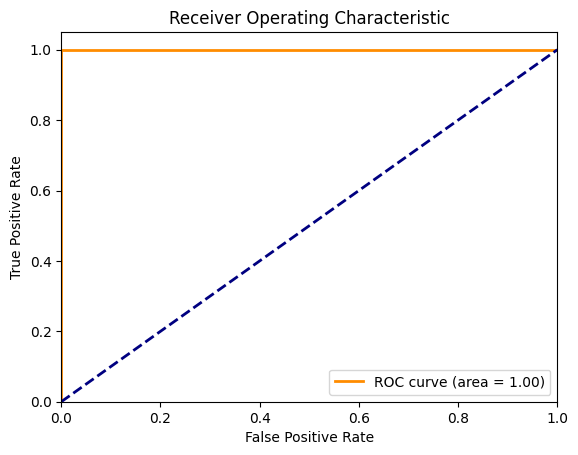

In [20]:
fpr, tpr, thresholds = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()